# Libraries

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

## Import Dataset

In [2]:
data = pd.read_csv('housing.csv')
data.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Features

In [3]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

## Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Check For Null Value

In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

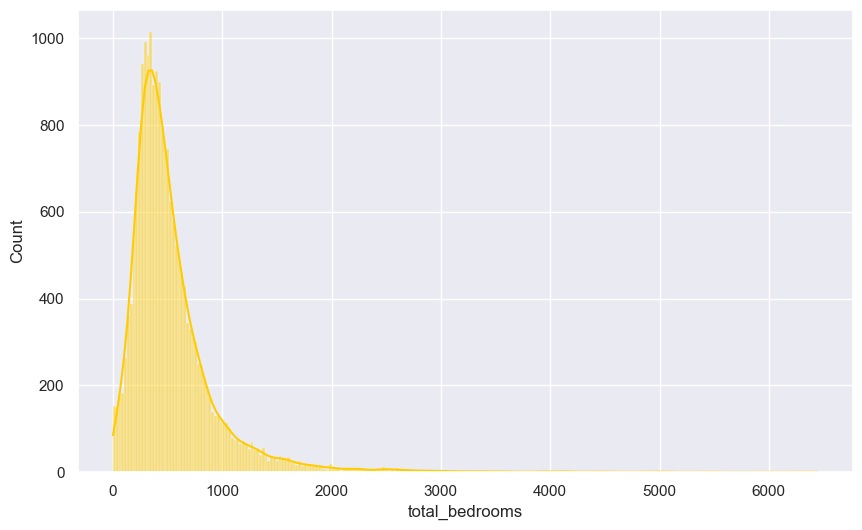

In [7]:
plt.figure(figsize= (10, 6))
sns.histplot(data['total_bedrooms'], color = '#ffcc00', kde= True);


In [8]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace= True)

## Exploratory Data Analysis

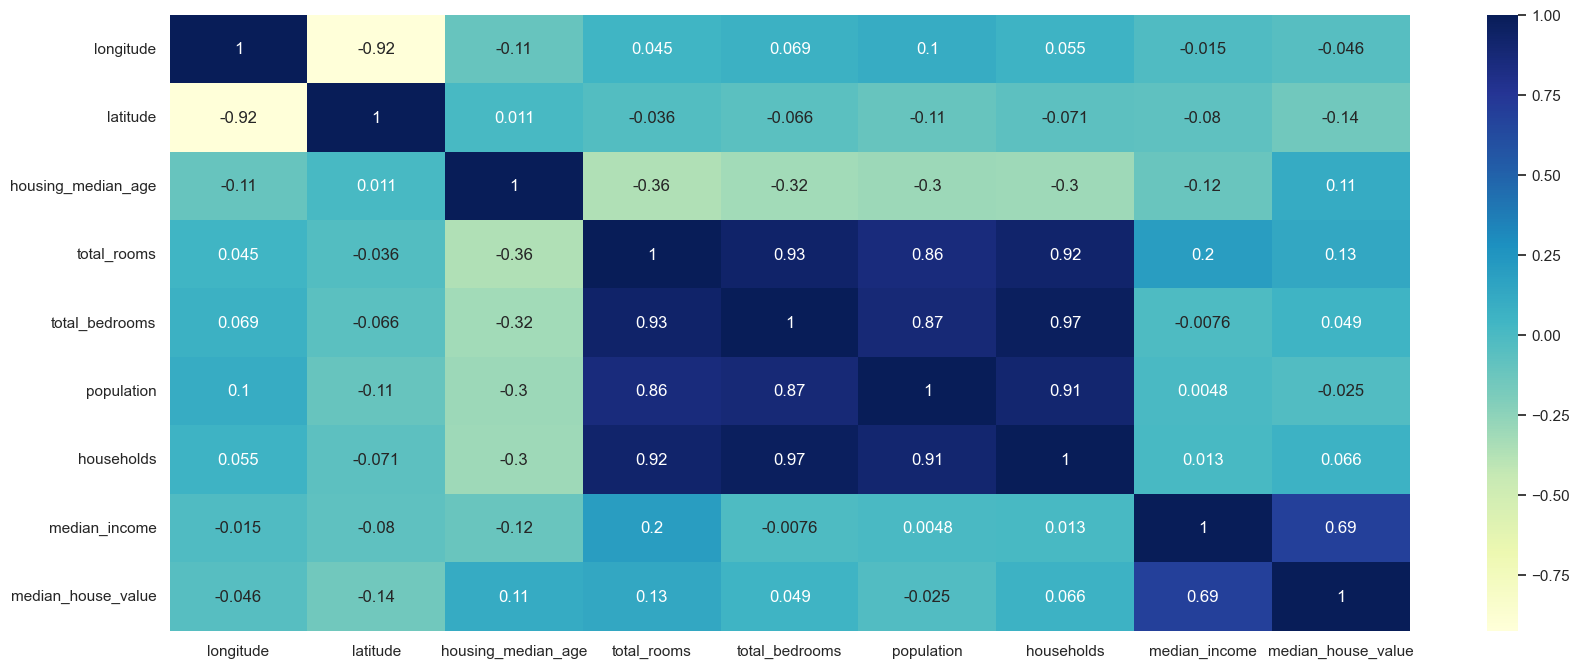

In [9]:
plt.figure(figsize= (20, 8))
sns.heatmap(data.corr(numeric_only=True), annot= True, cmap='YlGnBu')
plt.show()

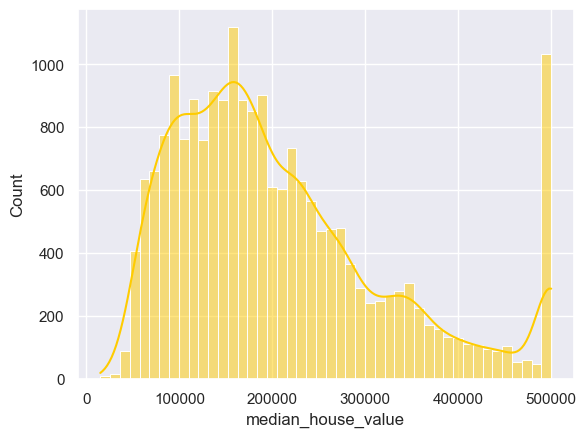

In [10]:
sns.histplot(data['median_house_value'], color = '#ffcc00', kde= True);

In [10]:
data['median_house_value'].skew()

0.9777632739098341

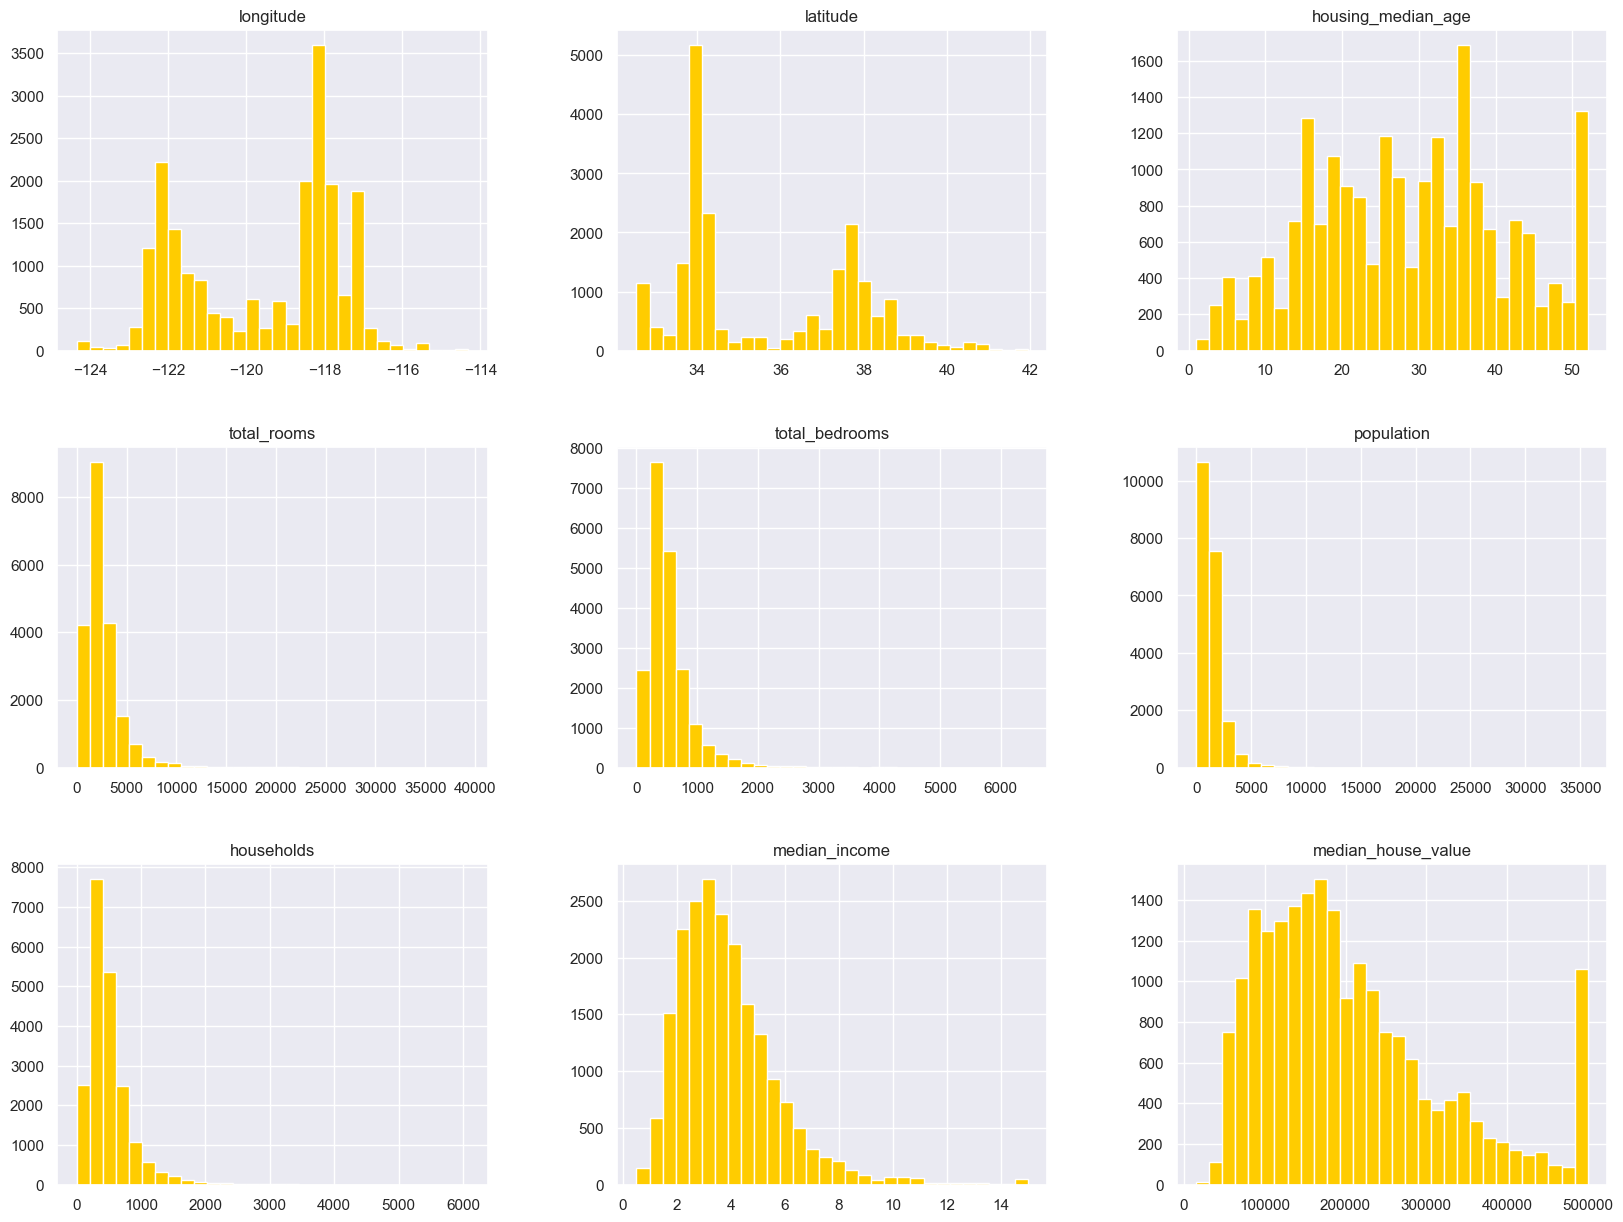

In [12]:
data.hist(bins = 30, figsize=(20, 15), color = '#ffcc00');

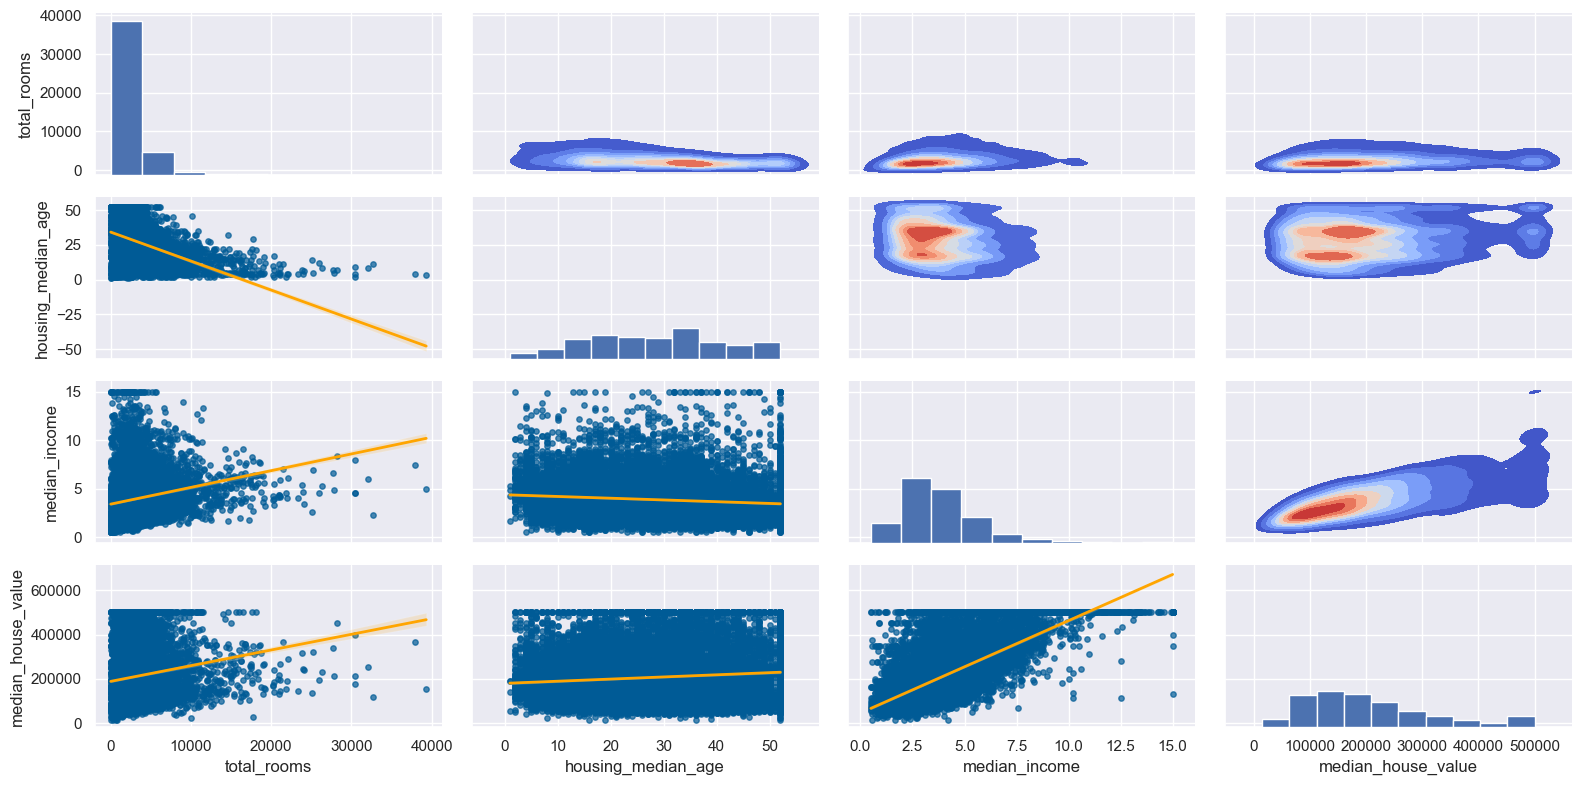

In [11]:
grid = sns.PairGrid(data, vars=['total_rooms', 'housing_median_age', 'median_income', 'median_house_value'],
                    height=2, aspect = 2)

grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'coolwarm', fill = True)

plt.show()

Since there are lot of outliers in the features log transformation is needed.
In this dataset the feature 'ocean_proximity' can be categorized in to 5 categories. Which are, 

* Near Bay

* <1H Ocean

* INLAND

* NEAR OCEAN

* ISLAND




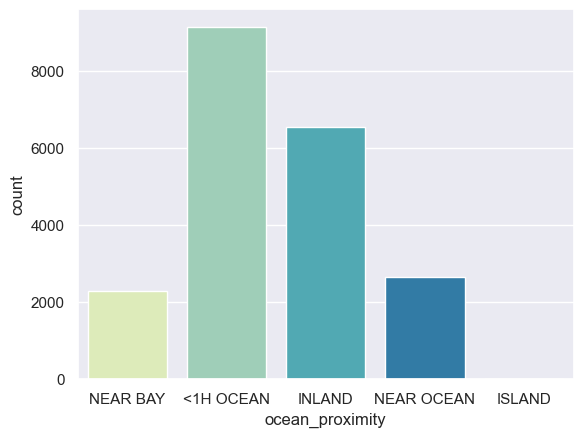

In [12]:
sns.countplot(x = data['ocean_proximity'], palette= 'YlGnBu');

Creating a scatter plot of the geogrophical location. Where the x-axis represents the longitude and the y-axis represents the latitude. Each point in the plot represents a housing district in California.

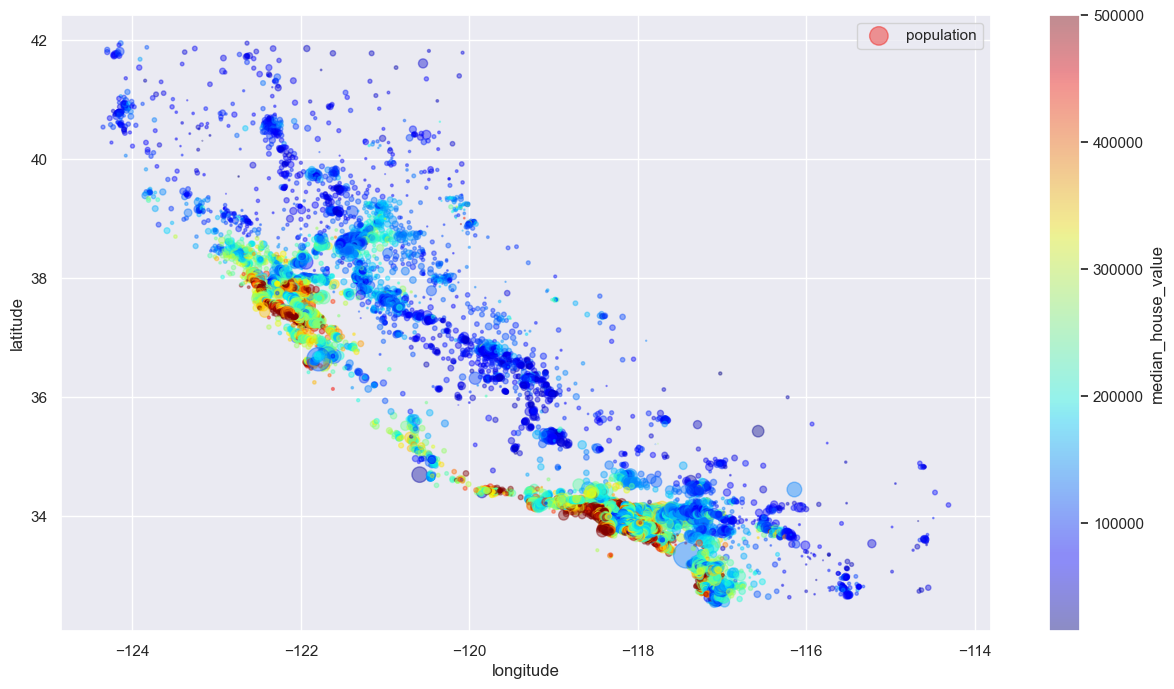

In [13]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

## Feature Engineering

In [14]:
data['bed_per_room'] = data['total_bedrooms'] / data['total_rooms']

log transformation

In [16]:
X = data.drop(['median_house_value'], axis=1)
y = np.log(data.median_house_value) # Applying log transformation

## Feature Transformations

In [17]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(X[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


Compute the skewness of the numerical features

In [18]:
skewed_columns = skew_df[skew_df['Abs_Skew'] > 0.5]['Feature'].values
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

Extracts the names of the features from a pandas DataFrame X that have an absolute skewness value greater than 0.5

In [19]:
for column in skewed_columns:
    X[column] = np.log(X[column])

Applying a logarithmic transformation to each feature in 'skewed_columns'. 
Since the skewed_columns contains the names of features with skewness greater than 0.5, the logarithmic transformation is being  used here to reduce the skewness in the data distribution

## Encoding

In [20]:
encoder=LabelEncoder()
X['ocean_proximity']=encoder.fit_transform(X['ocean_proximity'])

Transforms the categorical data into numerical values.

## Scaling

In [21]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,3,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,3,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,3,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,3,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,3,-1.759704


In [22]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)

## Splinting Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Model Training

In [24]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions_gbr = gbr.predict(X_test)

## Saving the Model

In [25]:
if not os.path.isfile("gbr.pickle"):
    # Pickle the model
    with open('gbr.pickle', 'wb') as files:
        pickle.dump(gbr, files)

## Evaluation & Visualising Predicted Data

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_gbr))
r2 = r2_score(y_test, predictions_gbr)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.2677415689850332
R-square: 0.7791340535896627


In [27]:
predictions_gbr = np.exp(predictions_gbr)
y_test = np.exp(y_test)

In [28]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions_gbr.round(2)})

,Actual,Predicted
20046,47700.0,59416.02
3024,45800.0,72123.26
15663,500001.0,411402.57
20484,218600.0,271037.95
9814,278000.0,228977.12
...,...,...
15362,263300.0,199478.32
16623,266800.0,193704.27
18086,500001.0,449309.44
2144,72300.0,78674.28


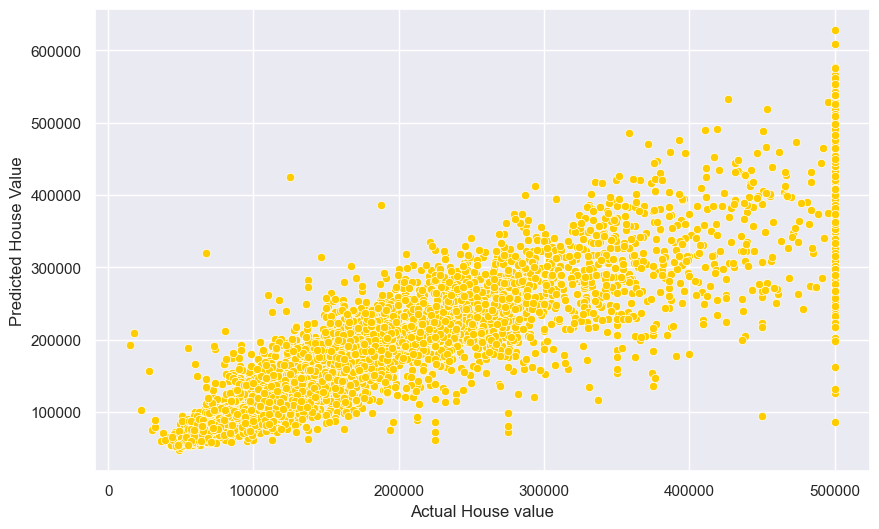

In [29]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= predictions_gbr, color= '#ffcc00')
plt.xlabel('Actual House value')
plt.ylabel('Predicted House Value')
plt.show()

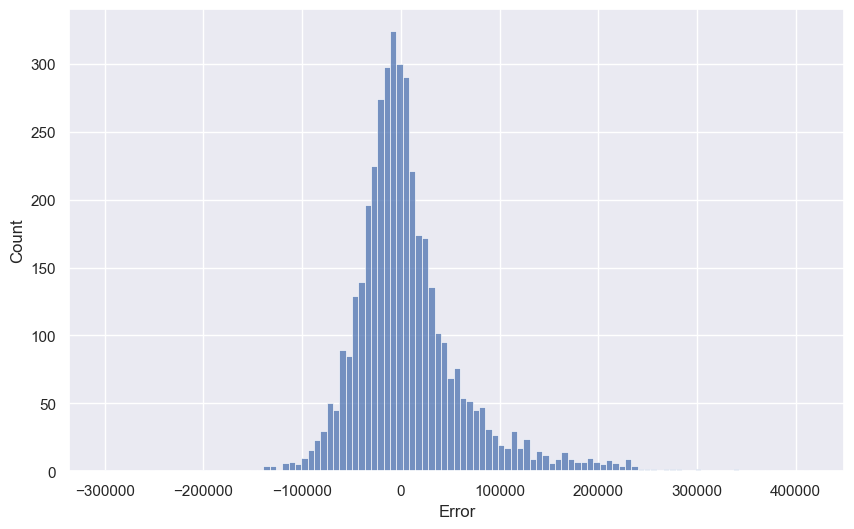

In [30]:
resid = y_test - predictions_gbr
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');